#### Locally weighted regressor (Custum dataset)

In [13]:
## Import data using the pandas module
import pandas as pds
dataX = pds.read_csv('weightedX.csv')
dataY = pds.read_csv('weightedY.csv')

## Check the type
print(type(dataX),type(dataY),"\n\n\n")

## Summary
print(dataX.describe(),"\n\n")

## Extract the values
X = dataX.values
Y = dataY.values

print(type(X)) ## Check the type

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> 



          1.2421
count  99.000000
mean    4.041444
std     4.804161
min    -4.978000
25%     0.060932
50%     3.783500
75%     8.220750
max    11.853000 


<class 'numpy.ndarray'>


The mean after standardisation 8.971499188890155e-18
The std after standardisation 1.0


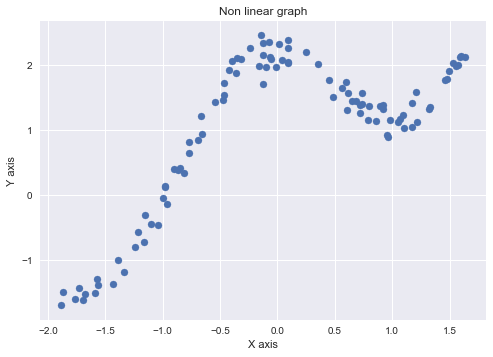

In [20]:
### Clearly std is not 1 and mean is not 0 so we standardise
X = (X - X.mean())/X.std()

print("The mean after standardisation {}".format(X.mean()))
print("The std after standardisation {}".format(X.std()))

### Visulize data
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],Y[:,0])
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Non linear graph")
plt.show()

In [121]:
### Modeling

import numpy as np

class LocallyWeightedRegression:
    def __init__(self,X,Y):
        """Initialize the X and Y data points"""
        self.X = X
        self.Y = Y
    
    def transformX(self):
        X = self.X
        ones = np.ones((X.shape[0],1))
        self.X = np.hstack((X,ones))
        return
    
    def getWeight(self,queryPoint,tau):
        """Return the weight corr. to the particular query point"""
        ## exp**-(query_point - x)**2/2tau**2
        weightMatrix = np.zeros((self.X.shape[0],self.X.shape[0]))
        X = self.X
        for i in range(X.shape[0]):
            weightMatrix[i][i] = np.exp(-1*np.dot((queryPoint - X[i]),(queryPoint - X[i]))/2*tau*tau)
        return weightMatrix
    
    def getTheta(self,queryPoint,tau):
        """Using the closed form return the theta"""
        X = self.X
        Y = self.Y
        
        W = self.getWeight(queryPoint,tau)
        firstPart = np.linalg.pinv(np.dot(X.T,(np.dot(W,X))))
        #print(firstPart.shape)
        secondPart = np.dot(X.T,(np.dot(W,Y)))
        #print(secondPart.shape)
        theta = np.dot(firstPart,secondPart)
        return theta
    
    def pred(self,queryPoint,tau):
        """Return the prediction"""
        theta = self.getTheta(queryPoint,tau)
#         print(theta)
        queryPoint = np.array([queryPoint,1])
        pred = np.dot(queryPoint,theta)
        return theta,pred
    
    def visulize(self):
        """Visulize the correctness of the model on diff tau"""
        xTemp = np.linspace(-2,1.5)
        tau = np.array([1.0,2.0,3.0,4.0])
        
        for j in tau:
            yPred = []
            for i in xTemp:
                theta,pred = self.pred(i,j)
                yPred.append(pred[0])

            plt.style.use("seaborn")
            plt.scatter(self.X[:,0],self.Y[:,0],label="Data")
            plt.scatter(xTemp,yPred,label="Prediction line")
            plt.xlabel("X axis")
            plt.ylabel("Y axis")
            plt.legend()
            plt.title("Non linear graph prediction visulize")
            plt.show()

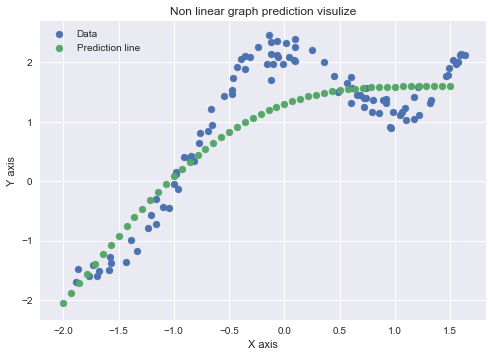

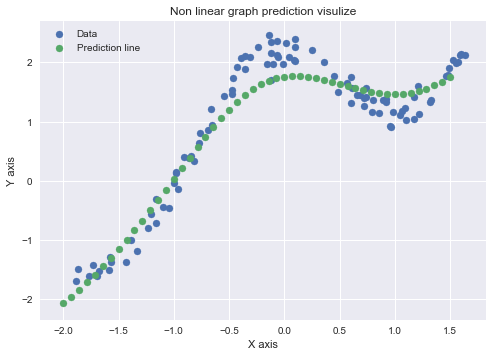

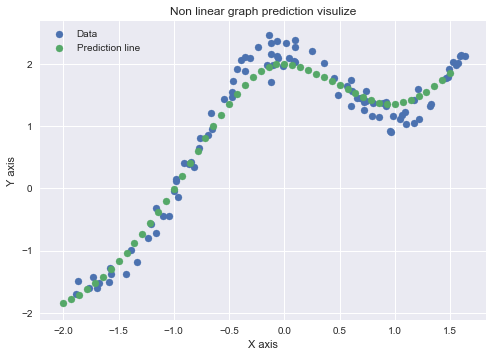

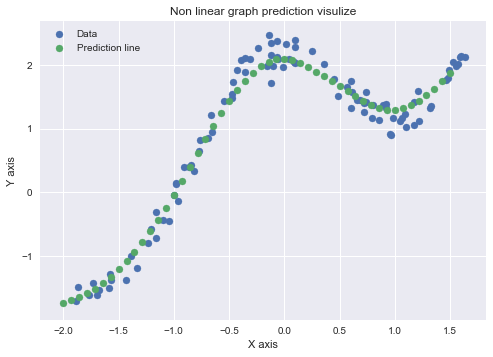

In [122]:
lr = LocallyWeightedRegression(X,Y)
lr.transformX()
lr.visulize()